# Effect of promotional emails (synthetic data)

In [49]:
import sys, os
sys.path.append("..")
sys.path.append(os.getcwd())
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from SI import SI

In [50]:
# pre-intervention dataframe
pre_df = pd.read_csv("../data/sales_syn_example_pre_df.csv")
pre_df.head()

,unit,intervention,metric,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
0,0,No emails,monthly_sales,127.919667,240.737342,198.508442,189.763897,185.403547,105.693512,268.902218,255.989050,127.861698,132.226380,118.018725,41.577507
1,1,No emails,monthly_sales,123.939443,196.134228,148.299389,169.279567,128.696478,109.635242,220.721851,179.467003,156.785072,97.490925,133.209415,57.655364
2,2,No emails,monthly_sales,132.364926,215.150298,197.986558,173.886643,194.787373,115.254186,231.117416,242.526469,109.676429,153.430065,114.116460,74.654693
3,3,No emails,monthly_sales,129.027276,147.374537,132.772557,141.180175,124.879312,124.063989,153.870165,137.922088,139.998489,116.570874,132.265109,108.295255
4,4,No emails,monthly_sales,114.846307,202.628300,156.370492,167.284452,159.511331,114.513209,235.534378,224.722840,151.971770,129.111610,129.471022,73.987960


In [51]:
# post-intervention dataframe 
post_df = pd.read_csv("../data/sales_syn_example_post_df.csv")
post_df.head()

,unit,intervention,metric,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
0,0,Daily Emails,monthly_sales,183.935663,184.437747,232.387312,229.873864,265.918943,255.150018,256.200500,209.473578,316.333895,405.968150,175.553810,232.467148
1,1,Daily Emails,monthly_sales,168.583025,167.792848,151.756921,158.237982,198.378694,262.007058,221.846862,210.576836,319.020346,381.594193,179.647515,238.817332
2,2,No emails,monthly_sales,156.913685,160.992364,234.728541,226.094926,238.899329,173.726231,209.935697,159.905672,204.922193,264.980098,143.124314,164.672410
3,3,Weekly Emails,monthly_sales,134.055000,148.587739,176.836902,172.967661,179.643551,158.605071,180.802859,160.076226,174.940002,190.878160,156.194943,157.317859
4,4,Daily Emails,monthly_sales,178.813987,160.716024,166.293414,169.387123,195.315081,216.449607,186.664812,170.920819,253.410165,316.441724,143.886563,196.552309


#### Synthetic Interventions algorithm

In [52]:
# t: percentage of spectral energy of data you want to retain 
# center: Boolean value indicating if you want to pre-process your data by cenetering
# df_synth: ouput dataframe of counterfactual predictions for all post-intervention interventions
# predictable_ivs: dictionary of diagnostic results for each intervention
t = 0.99
center = False
synthetic_sales = SI( rank_method = "Donoho", center=center)
synthetic_sales.fit(pre_df, post_df)
# df_synth, predictable_ivs = fill_tensor(pre_df, post_df, )
# df_synth.head()

#### The following results state which interventions are predictable using pre-intervention data (can ignore energy statistic for now)

In [53]:
# print("*** Diagnostic Results ***")
# for key, value in predictable_ivs.items():
#     print("Intervention {}: {}".format(key, value))
synthetic_sales.diagnosis

,unit,intervention,metric,pvalues_test,energy_statistic,energy_statistic_value
0,0,Daily Emails,monthly_sales,Pass,Pass,0.705579
1,0,No emails,monthly_sales,Pass,Pass,0.001543
2,0,Weekly Emails,monthly_sales,Pass,Pass,0.780725
3,1,Daily Emails,monthly_sales,Pass,Pass,0.742903
4,1,No emails,monthly_sales,Pass,Pass,0.001543
...,...,...,...,...,...,...
895,298,No emails,monthly_sales,Pass,Pass,0.001529
896,298,Weekly Emails,monthly_sales,Pass,Pass,0.780725
897,299,Daily Emails,monthly_sales,Pass,Pass,0.729734
898,299,No emails,monthly_sales,Pass,Pass,0.001570


## Zoom in into three customers


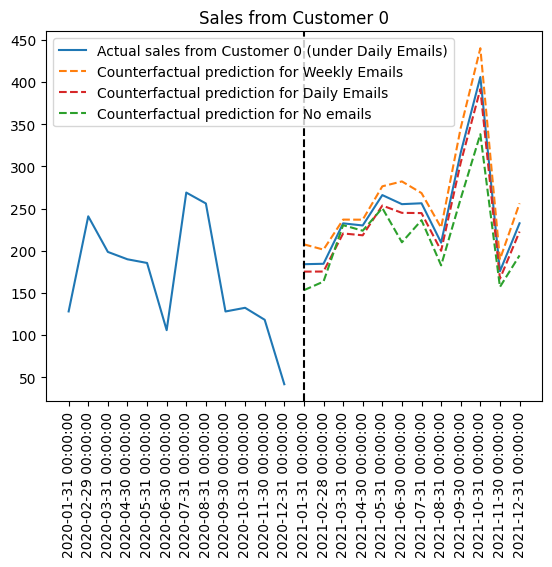

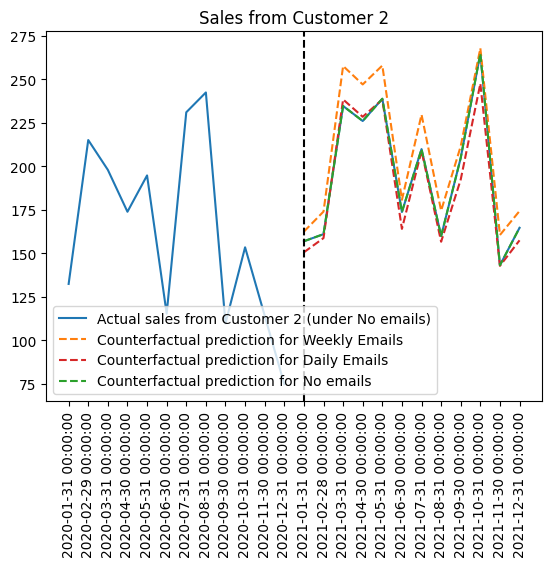

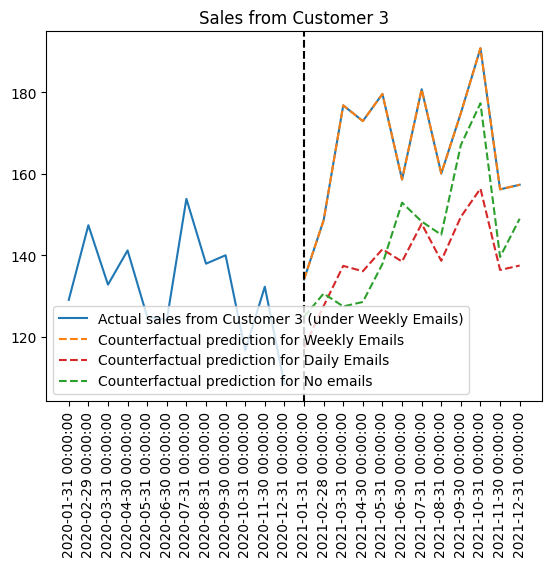

In [61]:
units = [0,2,3]
interventions = ["Daily Emails", "No emails", "Weekly Emails"]
colors = {"Weekly Emails":"tab:orange", "Daily Emails":"tab:red", "No emails":"tab:green"}
for u, unit in enumerate(units):
    plt.figure()
    plt.title(f"Sales from Customer {unit}")
    plt.plot(pre_df.loc[pre_df.unit == unit].iloc[:,3:].T)
    plt.plot(post_df.loc[post_df.unit == unit].iloc[:,3:].T, color = "tab:blue", label = f"Actual sales from Customer {unit} (under {interventions[u]})")
    syn = synthetic_sales.synthetic_results
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "Weekly Emails")].iloc[:,15:].T, '--', color = "tab:orange", label = 'Counterfactual prediction for Weekly Emails')
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "Daily Emails")].iloc[:,15:].T, '--',  color = "tab:red",  label = 'Counterfactual prediction for Daily Emails')
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "No emails")].iloc[:,15:].T, '--', color = "tab:green" ,label = 'Counterfactual prediction for No emails')

    plt.axvline(12, linestyle = 'dashed', color = 'black')


    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()
    

#### Cross-validation $R^2$ values

In [54]:
# df_dict = {
#     'synth_int': df_synth
# }
# units = pre_df.unit.unique()
# unit_diagnostic(units, post_df, df_dict)
synthetic_sales.cross_validation_score.mean()

/var/folders/jg/bh57brfs2_985glc7khw9sch0000gn/T/ipykernel_11544/1285118625.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  synthetic_sales.cross_validation_score.mean()


unit             149.500000
R2_rct scores      0.858628
R2 scores          0.914878
dtype: float64

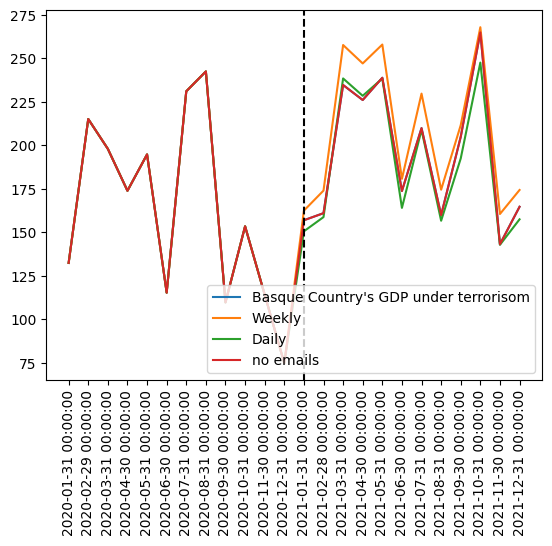

In [46]:
plt.plot(pre_df.loc[pre_df.unit == 2].iloc[:,3:].T)
plt.plot(post_df.loc[post_df.unit == 2].iloc[:,3:].T, color = 'tab:blue', label = "Basque Country's GDP under terrorisom")
syn = synthetic_sales.synthetic_results
plt.plot(syn.loc[(syn.unit == 2)&(syn.intervention == "Weekly Emails")].iloc[:,3:].T, label = 'Weekly')
plt.plot(syn.loc[(syn.unit == 2)&(syn.intervention == "Daily Emails")].iloc[:,3:].T, label = 'Daily')
plt.plot(syn.loc[(syn.unit == 2)&(syn.intervention == "No emails")].iloc[:,3:].T, label = 'no emails')

plt.axvline(12, linestyle = 'dashed', color = 'black')


plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [47]:
syn.loc[syn.unit == 2]

,unit,intervention,metric,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,...,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
2,2,Daily Emails,monthly_sales,132.364926,215.150298,197.986558,173.886643,194.787373,115.254186,231.117416,...,238.500039,228.523560,238.474300,164.024928,208.935652,156.638639,192.483750,247.620414,142.781532,157.452045
302,2,No emails,monthly_sales,132.364926,215.150298,197.986558,173.886643,194.787373,115.254186,231.117416,...,234.728541,226.094926,238.899329,173.726231,209.935697,159.905672,204.922193,264.980098,143.124314,164.672410
602,2,Weekly Emails,monthly_sales,132.364926,215.150298,197.986558,173.886643,194.787373,115.254186,231.117416,...,257.741325,247.139525,258.008278,180.742477,229.779674,174.499997,211.648198,267.972321,160.513059,174.325295


In [48]:
post_df.loc[post_df.unit ==2]

,unit,intervention,metric,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
2,2,No emails,monthly_sales,156.913685,160.992364,234.728541,226.094926,238.899329,173.726231,209.935697,159.905672,204.922193,264.980098,143.124314,164.67241
